                                                        DATA SCIENCE

Task 03:
    
Build a decision tree classifier to predict whether a customer will purchase a product or service
based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset 
from the UCI Machine Learning Repository.



In [336]:
#import libraries/dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

In [243]:
#Load the dataset to the pandas dataframe
df=pd.read_csv("C:/Users/Lezan/Documents/Prodigy internship/bank.csv")

In [244]:
#Displaying the data
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [245]:
#Coverting comma seperated to column format
data=df['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';',expand=True)


In [246]:
#printing the dataframe
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [247]:
d1=df.columns.str.split(";")
d1

Index([['age', '"job"', '"marital"', '"education"', '"default"', '"balance"', '"housing"', '"loan"', '"contact"', '"day"', '"month"', '"duration"', '"campaign"', '"pdays"', '"previous"', '"poutcome"', '"y"']], dtype='object')

In [248]:
d2=['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration','campaign','pdays','previous','poutcome', 'y']

In [249]:
data.columns=d2[:len(data.columns)]
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [250]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""


In [251]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""
45210,37,"""entrepreneur""","""married""","""secondary""","""no""",2971,"""no""","""no""","""cellular""",17,"""nov""",361,2,188,11,"""other""","""no"""


In [252]:
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39656,50,"""admin.""","""married""","""tertiary""","""no""",843,"""no""","""yes""","""cellular""",27,"""may""",71,3,-1,0,"""unknown""","""no"""
32993,29,"""blue-collar""","""married""","""secondary""","""no""",577,"""yes""","""no""","""telephone""",17,"""apr""",501,3,331,10,"""other""","""no"""
17833,51,"""blue-collar""","""married""","""secondary""","""no""",1151,"""yes""","""yes""","""cellular""",29,"""jul""",125,2,-1,0,"""unknown""","""no"""
18190,34,"""admin.""","""married""","""primary""","""no""",412,"""yes""","""no""","""cellular""",30,"""jul""",134,2,-1,0,"""unknown""","""no"""
4673,31,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",20,"""may""",134,1,-1,0,"""unknown""","""no"""


In [253]:
data.shape


(45211, 17)

In [254]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""cellular""",20,"""may""",124,1,-1,0,"""unknown""","""no"""
freq,2085,9732,27214,23202,44396,3514,25130,37967,29285,2752,13766,188,17544,36954,36954,36959,39922


In [255]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [256]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [257]:
data['age'].unique()

array(['58', '44', '33', '47', '35', '28', '42', '43', '41', '29', '53',
       '57', '51', '45', '60', '56', '32', '25', '40', '39', '52', '46',
       '36', '49', '59', '37', '50', '54', '55', '48', '24', '38', '31',
       '30', '27', '34', '23', '26', '61', '22', '21', '20', '66', '62',
       '83', '75', '67', '70', '65', '68', '64', '69', '72', '71', '19',
       '76', '85', '63', '90', '82', '73', '74', '78', '80', '94', '79',
       '77', '86', '95', '81', '18', '89', '84', '87', '92', '93', '88'],
      dtype=object)

In [258]:
data['job'].unique()

array(['"management"', '"technician"', '"entrepreneur"', '"blue-collar"',
       '"unknown"', '"retired"', '"admin."', '"services"',
       '"self-employed"', '"unemployed"', '"housemaid"', '"student"'],
      dtype=object)

In [259]:
data['marital'].unique()

array(['"married"', '"single"', '"divorced"'], dtype=object)

In [260]:
data['education'].unique()

array(['"tertiary"', '"secondary"', '"unknown"', '"primary"'],
      dtype=object)

In [261]:
data['default'].unique()

array(['"no"', '"yes"'], dtype=object)

In [262]:
data['housing'].unique()

array(['"yes"', '"no"'], dtype=object)

In [263]:
data['loan'].unique()

array(['"no"', '"yes"'], dtype=object)

In [264]:
data['contact'].unique()

array(['"unknown"', '"cellular"', '"telephone"'], dtype=object)

In [265]:
data['day'].unique()

array(['5', '6', '7', '8', '9', '12', '13', '14', '15', '16', '19', '20',
       '21', '23', '26', '27', '28', '29', '30', '2', '3', '4', '11',
       '17', '18', '24', '25', '1', '10', '22', '31'], dtype=object)

In [266]:
data['month'].unique()

array(['"may"', '"jun"', '"jul"', '"aug"', '"oct"', '"nov"', '"dec"',
       '"jan"', '"feb"', '"mar"', '"apr"', '"sep"'], dtype=object)

In [267]:
data['poutcome'].unique()

array(['"unknown"', '"failure"', '"other"', '"success"'], dtype=object)

In [268]:
data['y'].unique()

array(['"no"', '"yes"'], dtype=object)

In [269]:
data1 = pd.DataFrame()

In [270]:
#Label encoding of the categorical columns
data1['loan']=data['loan'].map({'"no"':1,'"yes"':2})
data1['contact']=data['contact'].map({'"unknown"':3,'"cellular"':1,'"telephone"':2})
data1['poutcome']=data['poutcome'].map({'"unknown"':1,'"failure"':2,'"other"':3,'"success"':4})
data1['job']=data['job'].map({'"management"':1, '"technician"':2, '"entrepreneur"':3, '"blue-collar"':4,
       '"unknown"':5, '"retired"':6, '"admin."':7, '"services"':8,
       '"self-employed"':9, '"unemployed"':10, '"housemaid"':11, '"student"':12})
data1['marital']=data['marital'].map({'"married"':1, '"single"':2, '"divorced"':3})
data1['education']=data['education'].map({'"tertiary"':1, '"secondary"':2, '"unknown"':3, '"primary"':4})
data1['default']=data['default'].map({'"no"':1,'"yes"':2})
data1['housing']=data['housing'].map({'"no"':1,'"yes"':2})
data1['month']=data['month'].map({'"may"':1, '"jun"':2, '"jul"':3, '"aug"':4, '"oct"':5, '"nov"':6, '"dec"':7,
       '"jan"':8, '"feb"':9, '"mar"':10, '"apr"':11, '"sep"':12})
data1['y']=data['y'].map({'"no"':0,'"yes"':1})

In [271]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [272]:
data1

,loan,contact,poutcome,job,marital,education,default,housing,month,y
0,1,3,1,1,1,1,1,2,1,0
1,1,3,1,2,2,2,1,2,1,0
2,2,3,1,3,1,2,1,2,1,0
3,1,3,1,4,1,3,1,2,1,0
4,1,3,1,5,2,3,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
45206,1,1,1,2,1,1,1,1,6,1
45207,1,1,1,6,3,4,1,1,6,1
45208,1,1,4,6,1,2,1,1,6,1
45209,1,2,1,4,1,2,1,1,6,0


In [273]:
data1['age']=data['age']
data1['day']=data['day']
data1['balance']=data['balance']
data1['duration']=data['duration']
data1['campaign']=data['campaign']
data1['pdays']=data['pdays']
data1['previous']=data['previous']               

In [274]:
data1

,loan,contact,poutcome,job,marital,education,default,housing,month,y,age,day,balance,duration,campaign,pdays,previous
0,1,3,1,1,1,1,1,2,1,0,58,5,2143,261,1,-1,0
1,1,3,1,2,2,2,1,2,1,0,44,5,29,151,1,-1,0
2,2,3,1,3,1,2,1,2,1,0,33,5,2,76,1,-1,0
3,1,3,1,4,1,3,1,2,1,0,47,5,1506,92,1,-1,0
4,1,3,1,5,2,3,1,1,1,0,33,5,1,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,1,1,2,1,1,1,1,6,1,51,17,825,977,3,-1,0
45207,1,1,1,6,3,4,1,1,6,1,71,17,1729,456,2,-1,0
45208,1,1,4,6,1,2,1,1,6,1,72,17,5715,1127,5,184,3
45209,1,2,1,4,1,2,1,1,6,0,57,17,668,508,4,-1,0


In [276]:
data1.isnull().sum()

loan         0
contact      0
poutcome     0
job          0
marital      0
education    0
default      0
housing      0
month        0
y            0
age          0
day          0
balance      0
duration     0
campaign     0
pdays        0
previous     0
dtype: int64

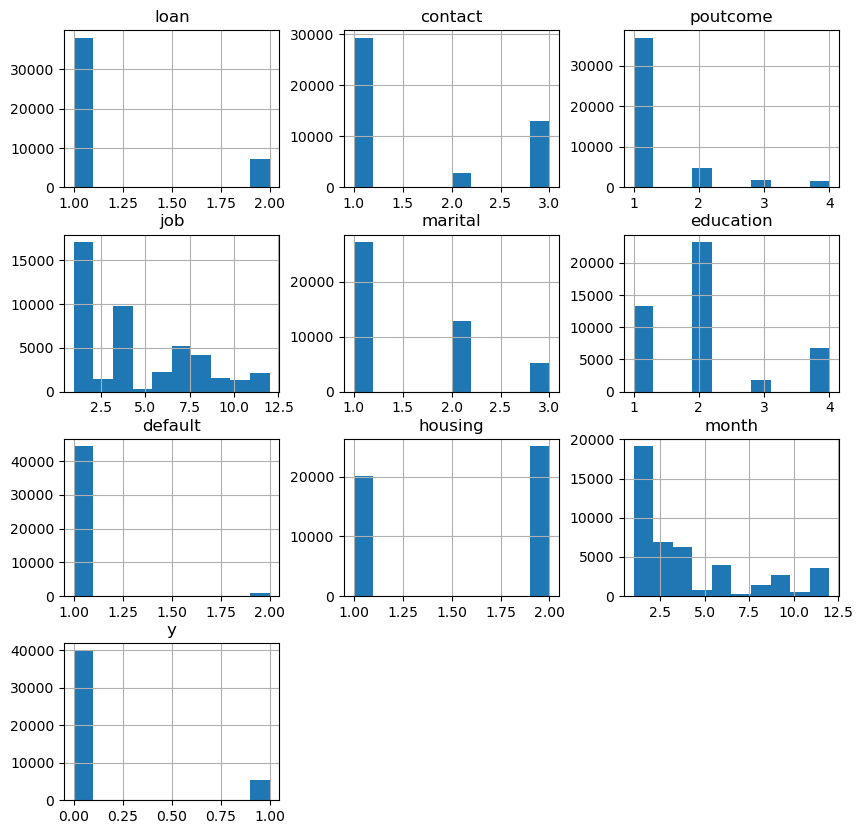

In [277]:
#Histogram to represent distriution of all the columns
data1.hist(figsize=(10,10))
plt.show()

C:\Users\Lezan\AppData\Local\Temp\ipykernel_7000\3085753552.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data1.corr()


<Axes: >

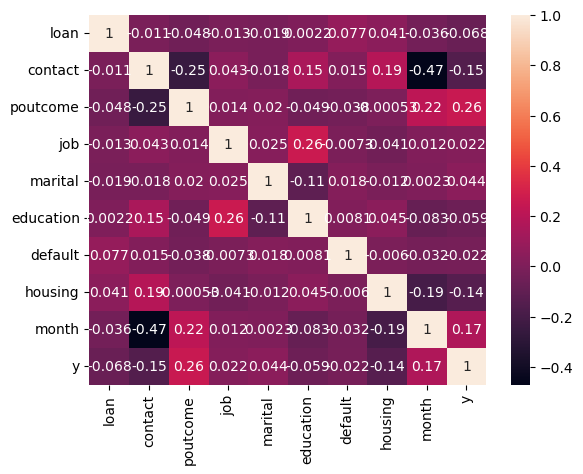

In [278]:
#Correlation matrix
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

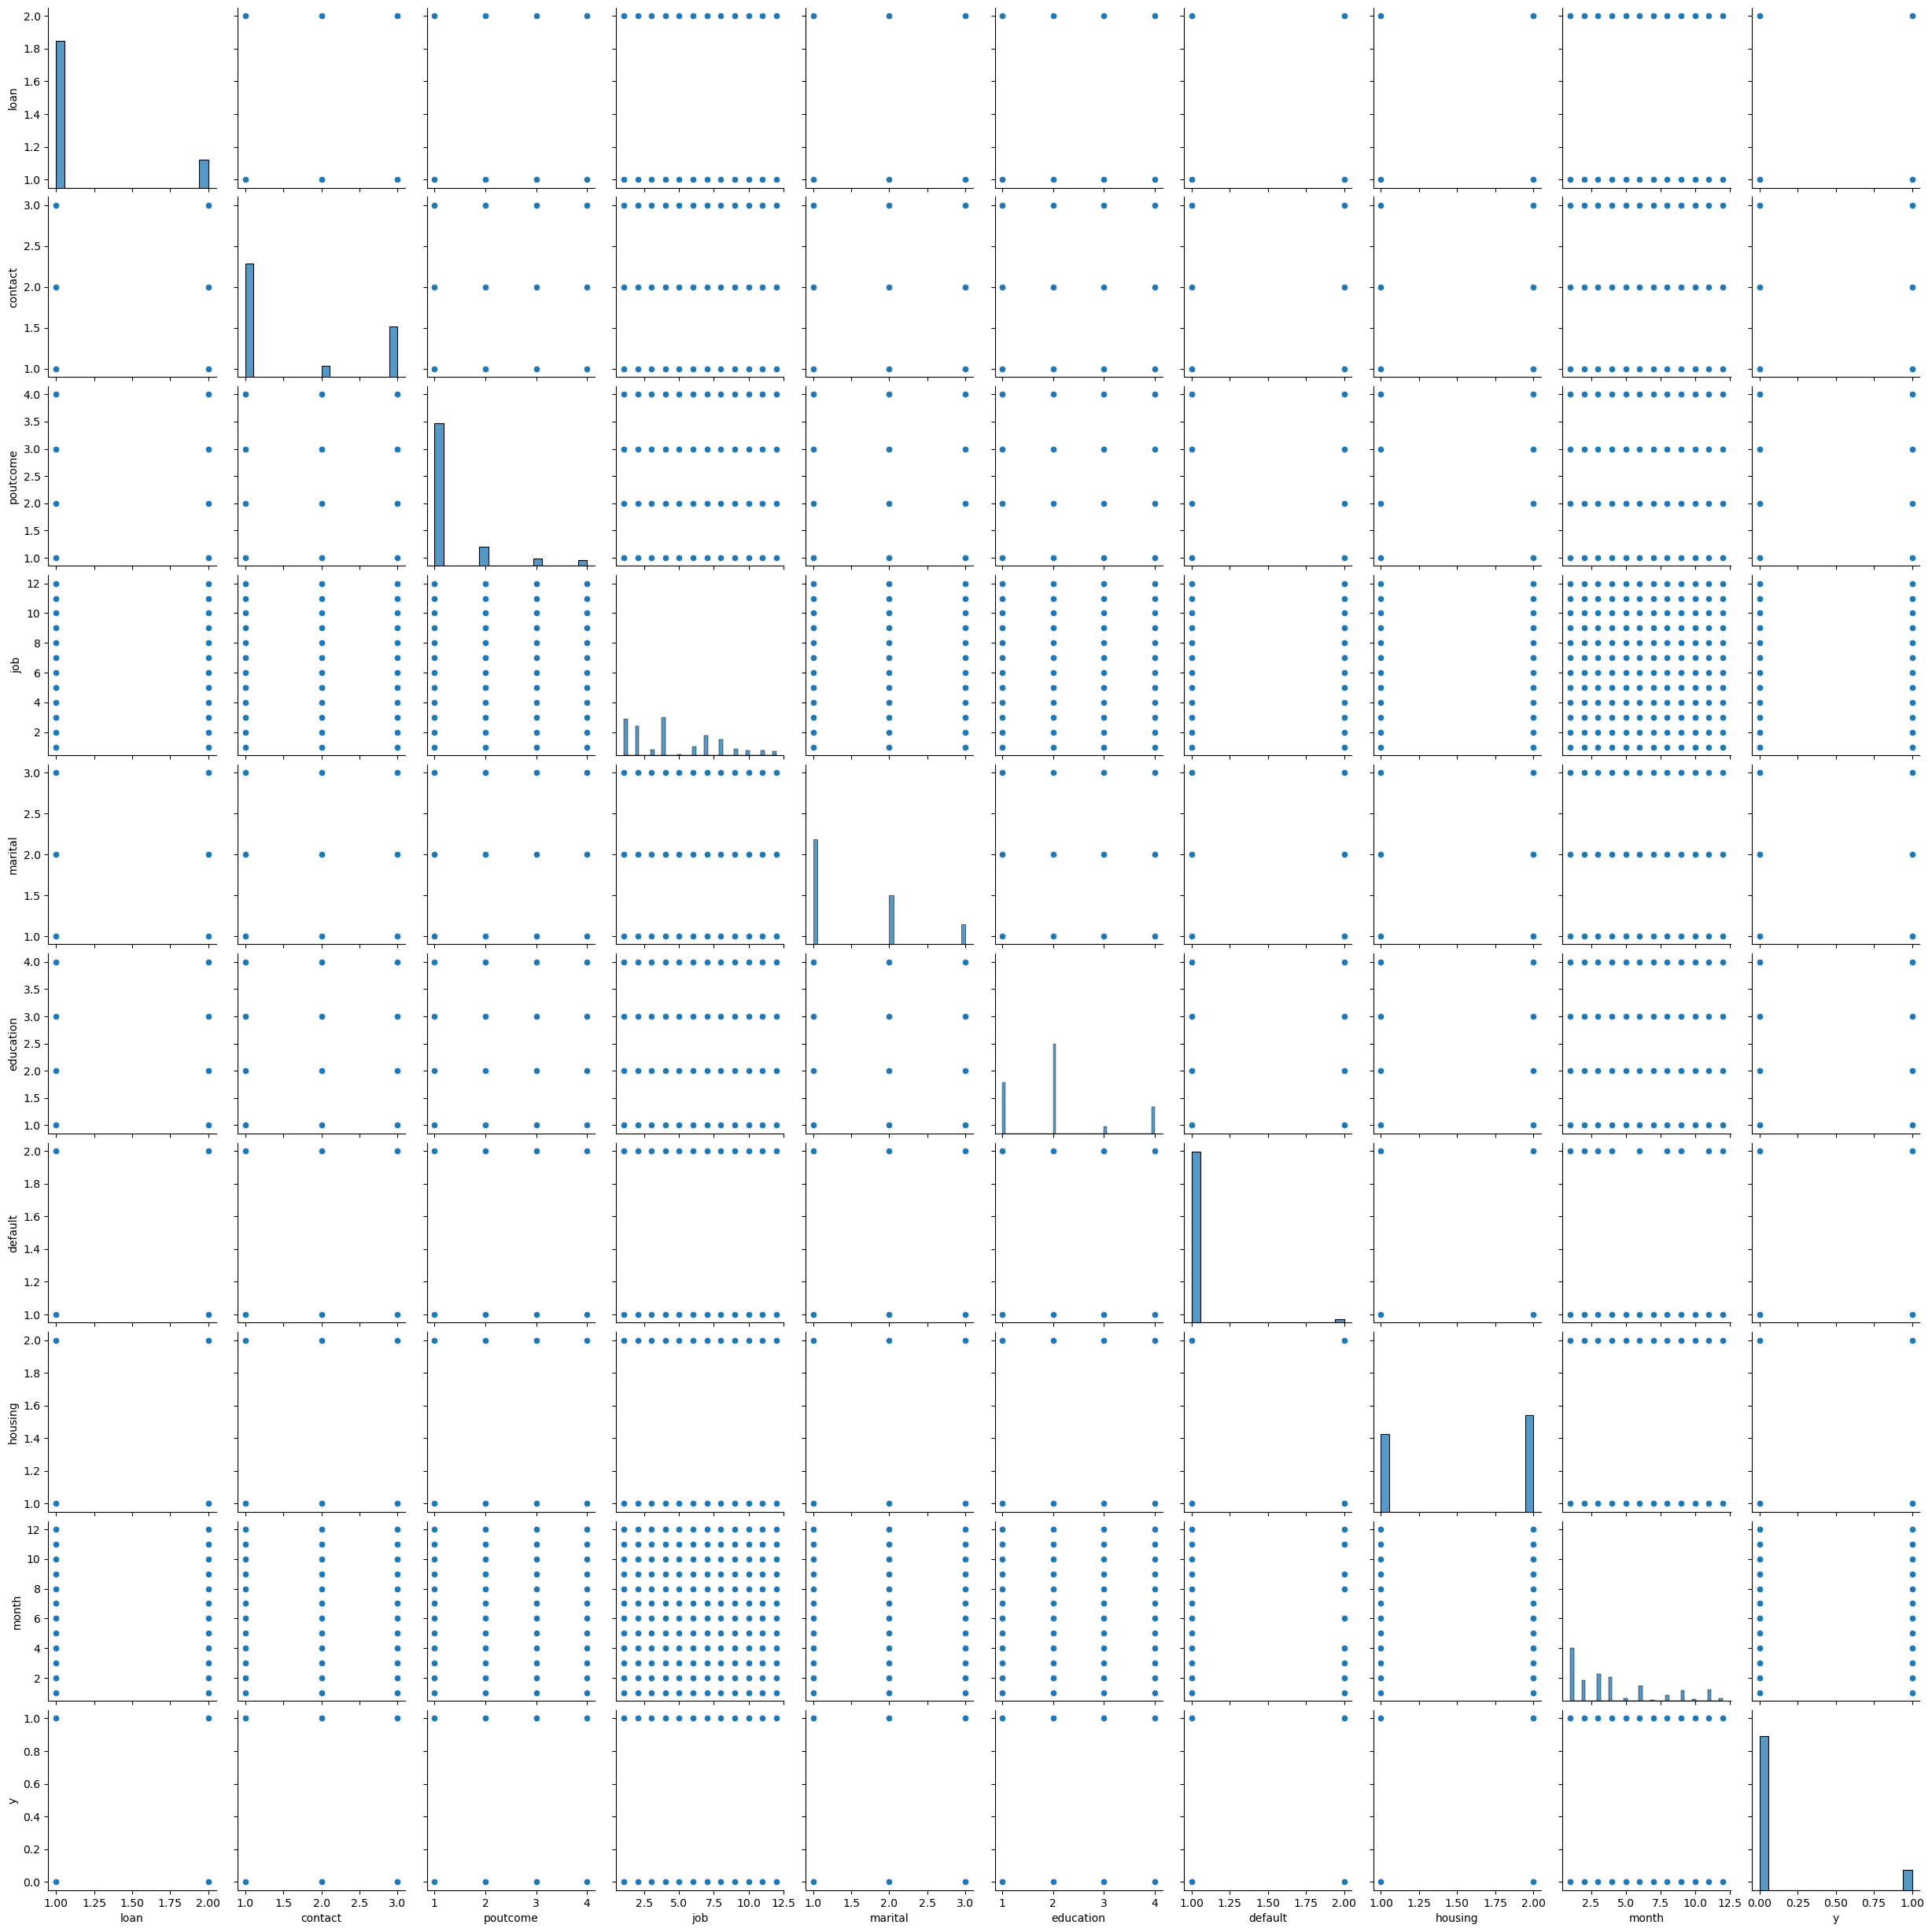

In [279]:
#pairplot representaion of all columns
sns.pairplot(data1)

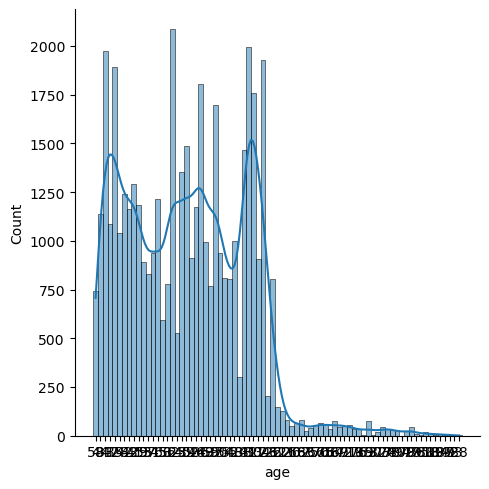

In [291]:

sns.displot(data1['age'],kde=True)

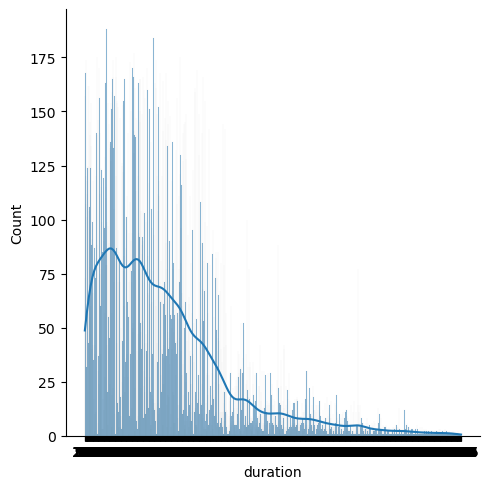

In [292]:
sns.displot(data['duration'], kde=True)

<Axes: xlabel='loan', ylabel='count'>

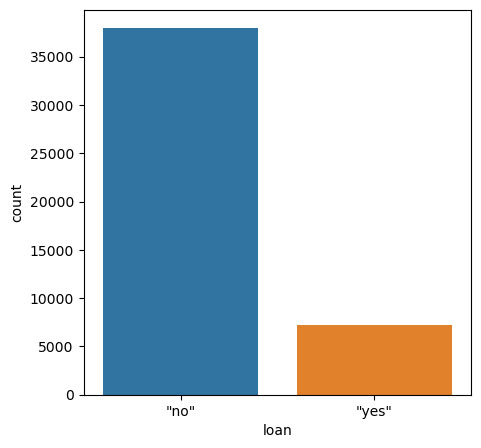

In [294]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x='loan',data=data)


<Axes: xlabel='housing', ylabel='count'>

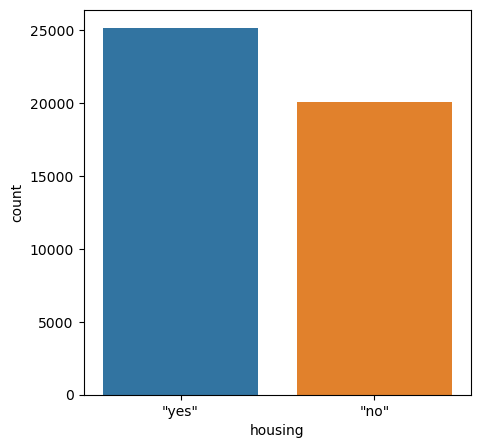

In [297]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x='housing',data=data)

<Axes: xlabel='default', ylabel='count'>

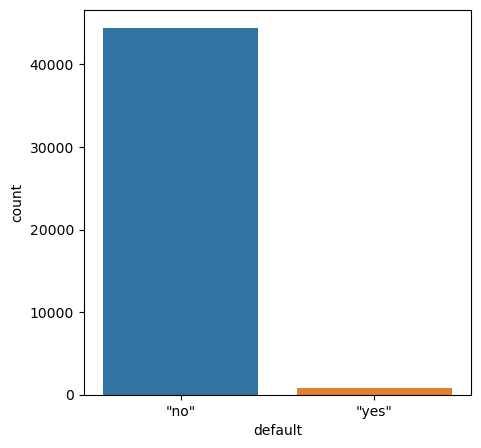

In [298]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x='default',data=data)

<Axes: xlabel='y', ylabel='count'>

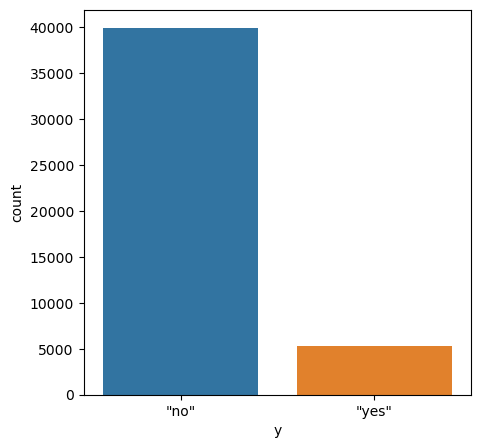

In [299]:
fig=plt.figure(figsize=(5, 5))
sns.countplot(x='y',data=data)

<Axes: xlabel='job', ylabel='count'>

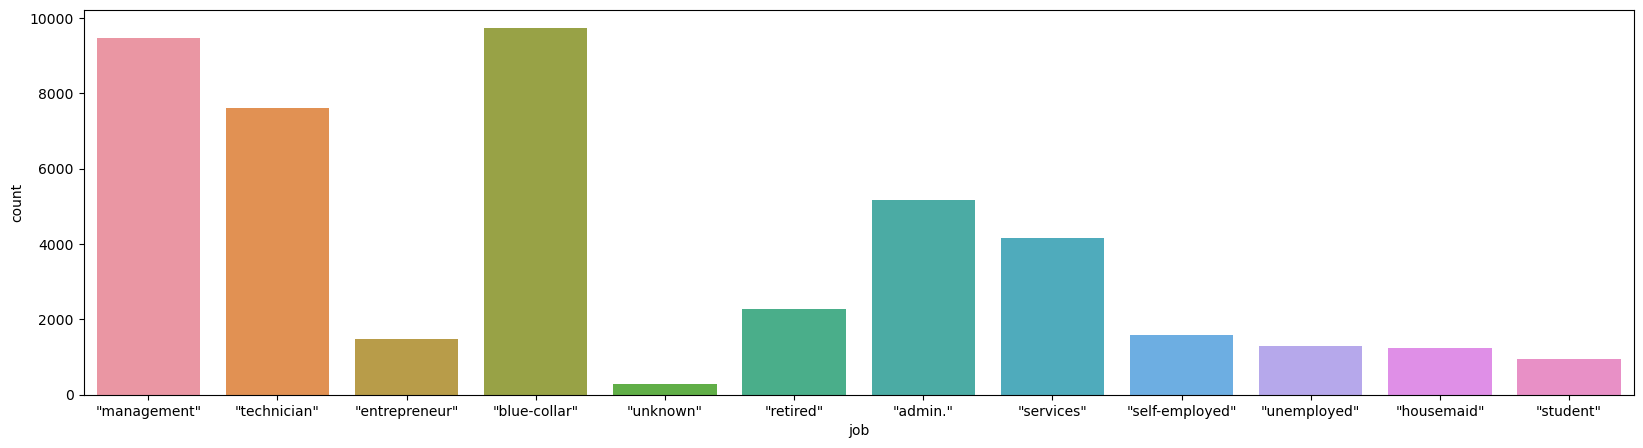

In [302]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='job',data=data)

<Axes: xlabel='marital', ylabel='count'>

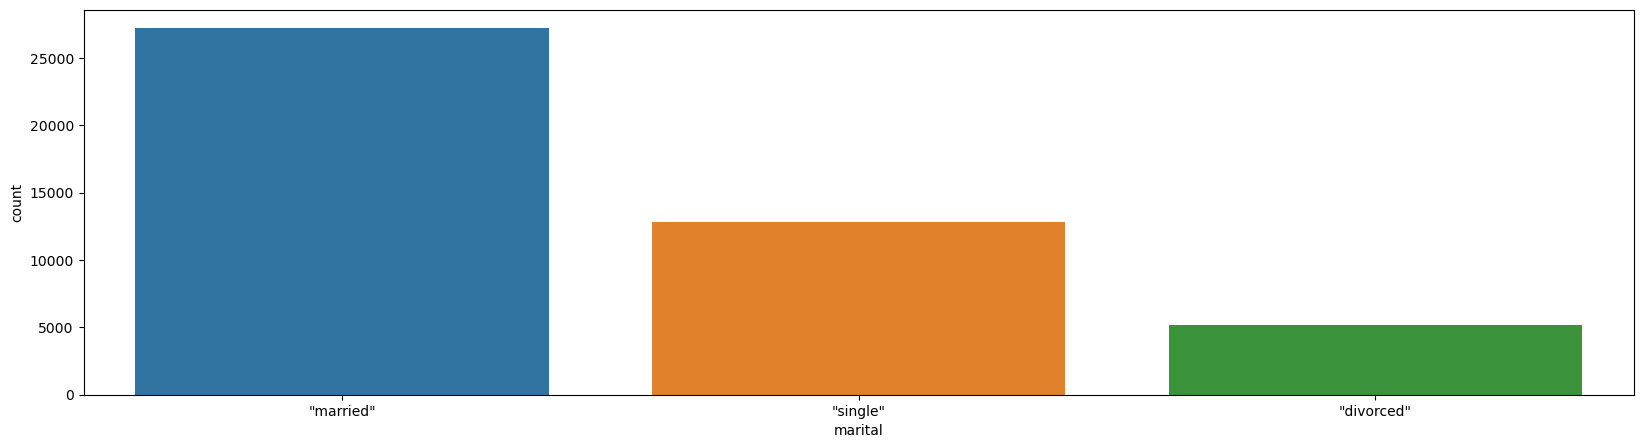

In [303]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='marital',data=data)

<Axes: xlabel='education', ylabel='count'>

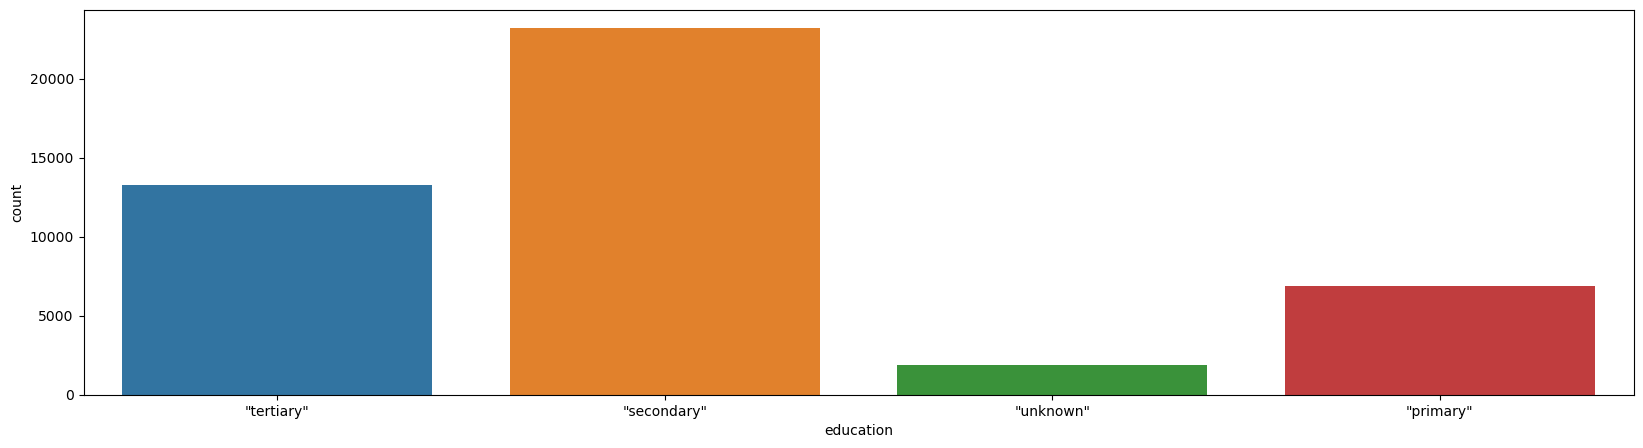

In [304]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='education',data=data)

<Axes: xlabel='contact', ylabel='count'>

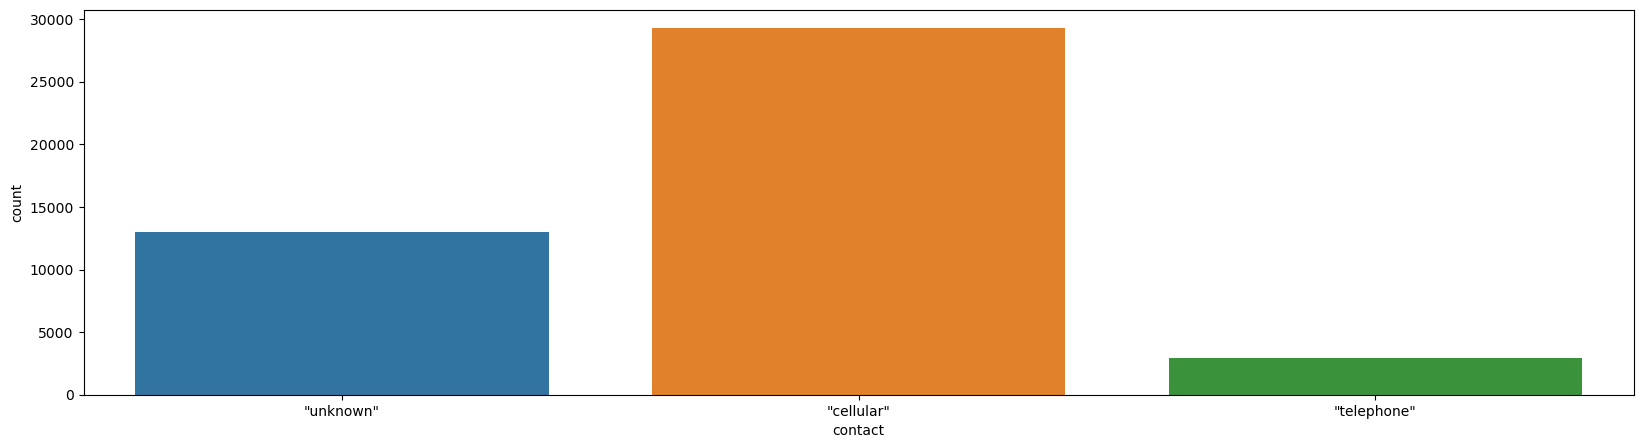

In [305]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='contact',data=data)

<Axes: xlabel='month', ylabel='count'>

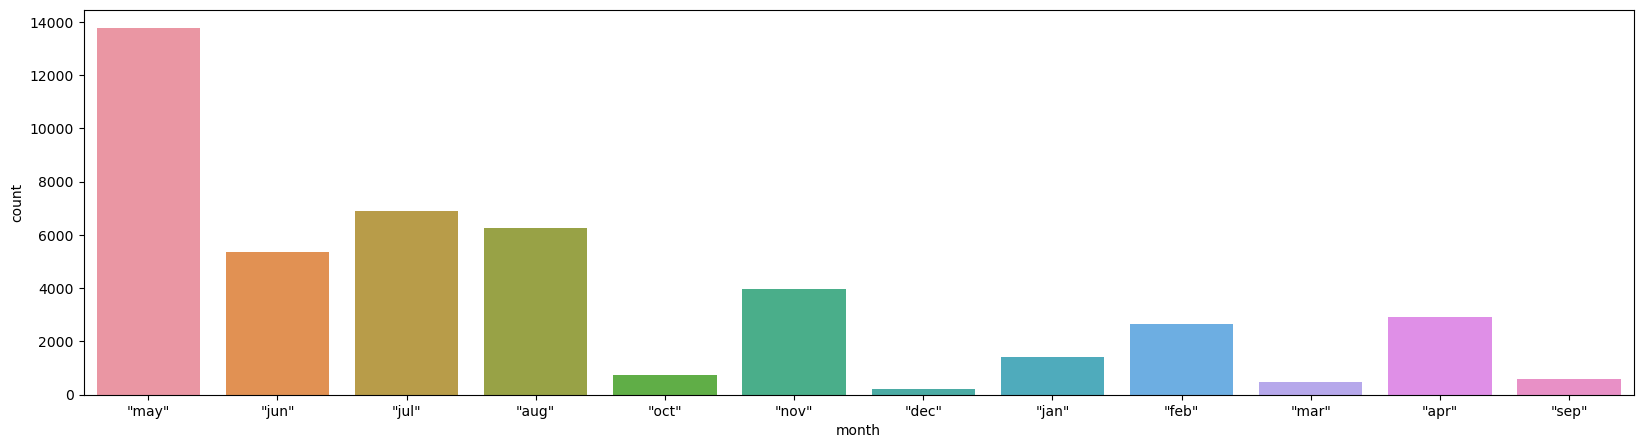

In [306]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='month',data=data)

<Axes: xlabel='campaign', ylabel='count'>

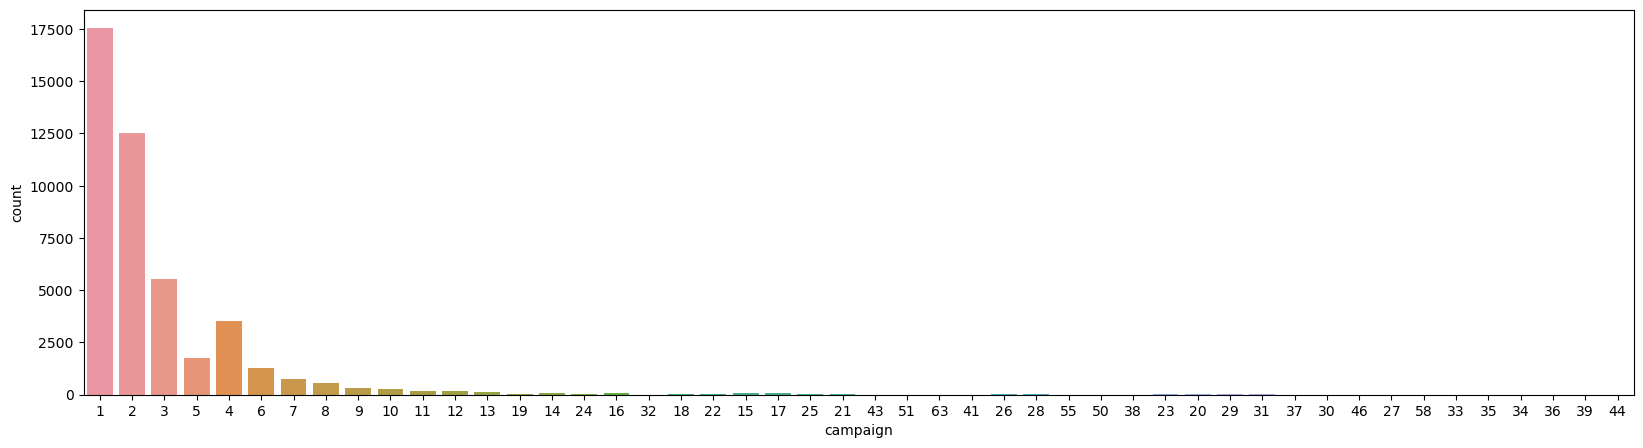

In [307]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='campaign',data=data)

<Axes: xlabel='previous', ylabel='count'>

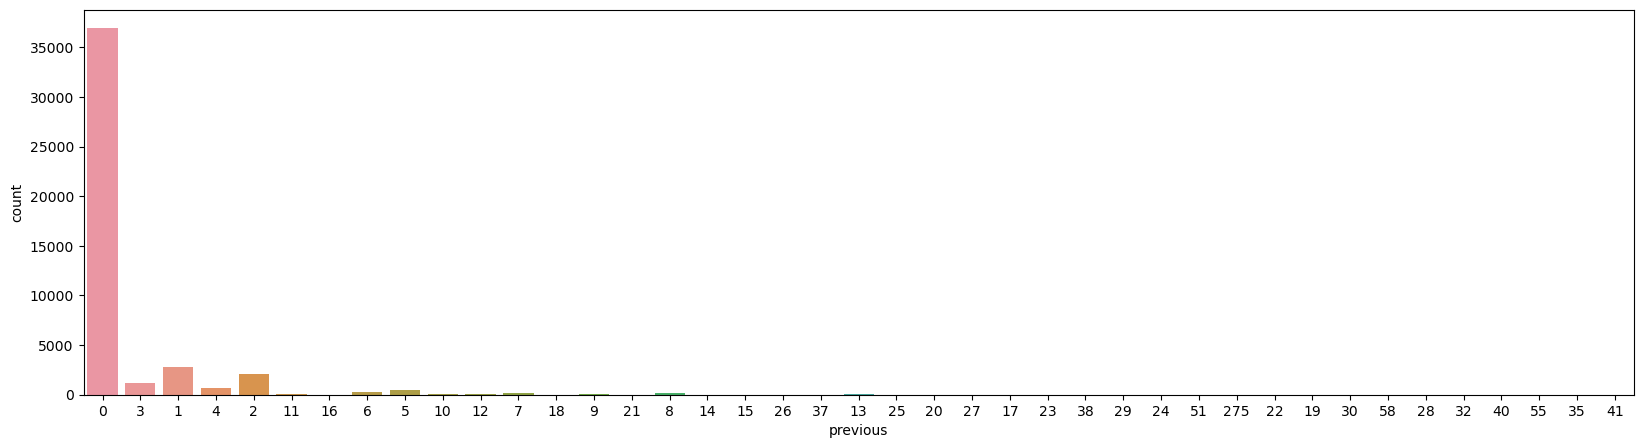

In [309]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='previous',data=data)

<Axes: xlabel='poutcome', ylabel='count'>

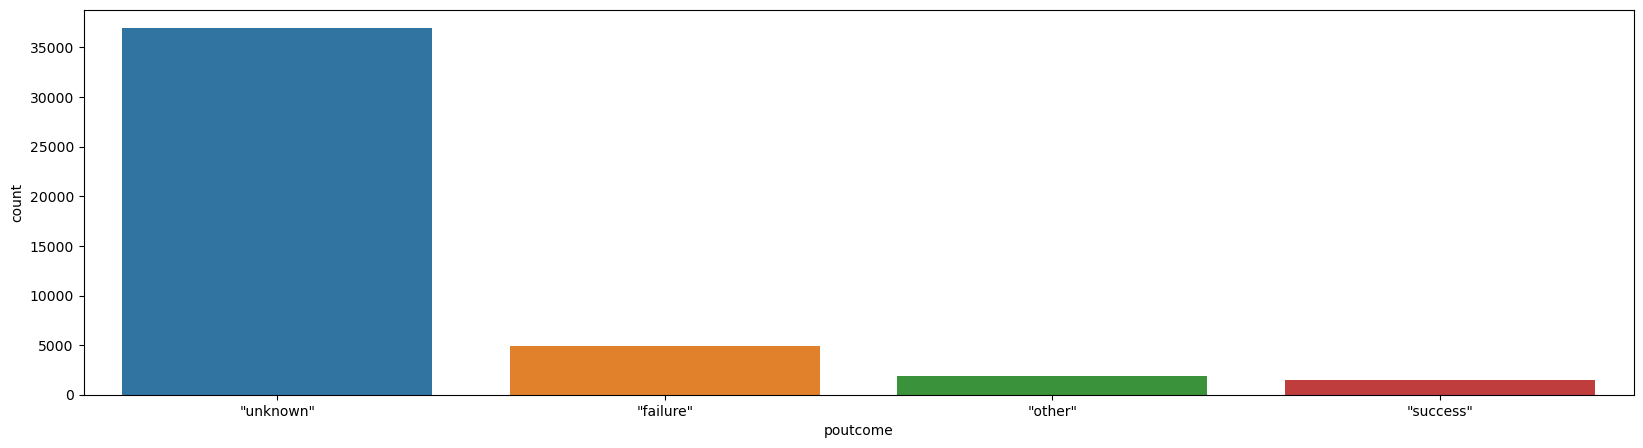

In [310]:
fig=plt.figure(figsize=(20, 5))
sns.countplot(x='poutcome',data=data)

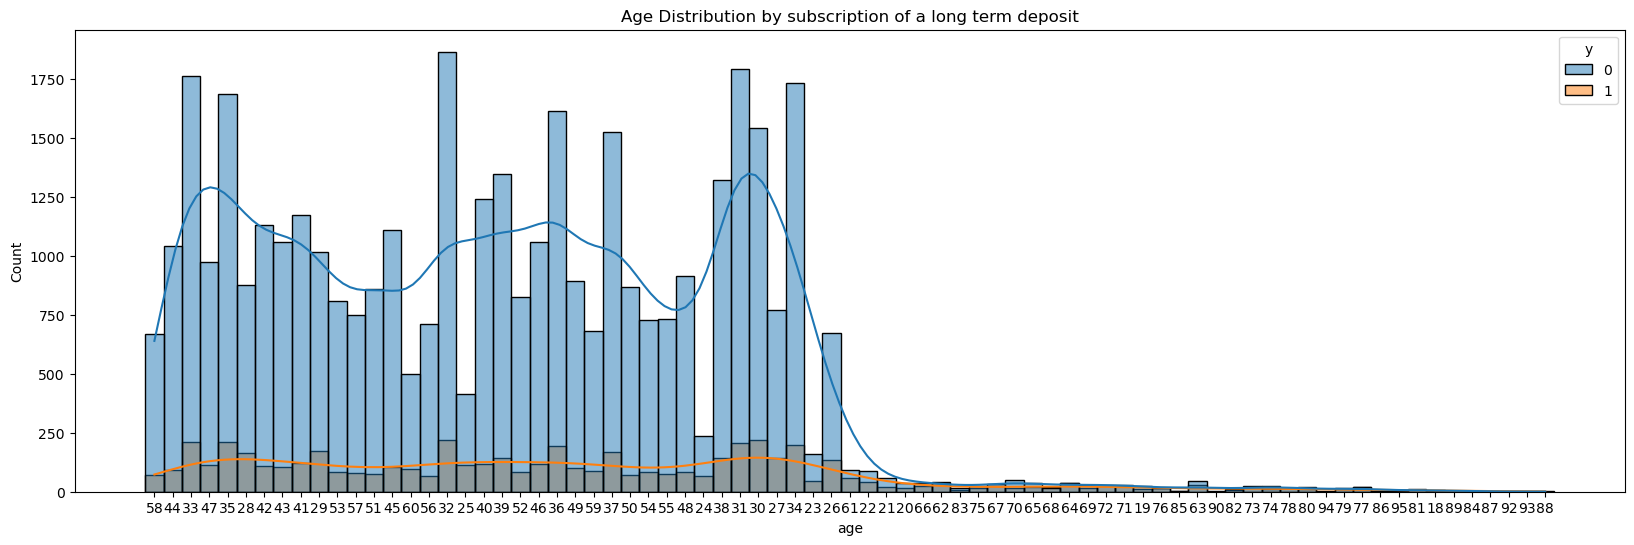

In [321]:
#the distribution of ages of the passengers
plt.figure(figsize=(20, 6))
sns.histplot(data=data1, x='age', kde=True, hue='y')
plt.title('Age Distribution by subscription of a long term deposit')
plt.show()

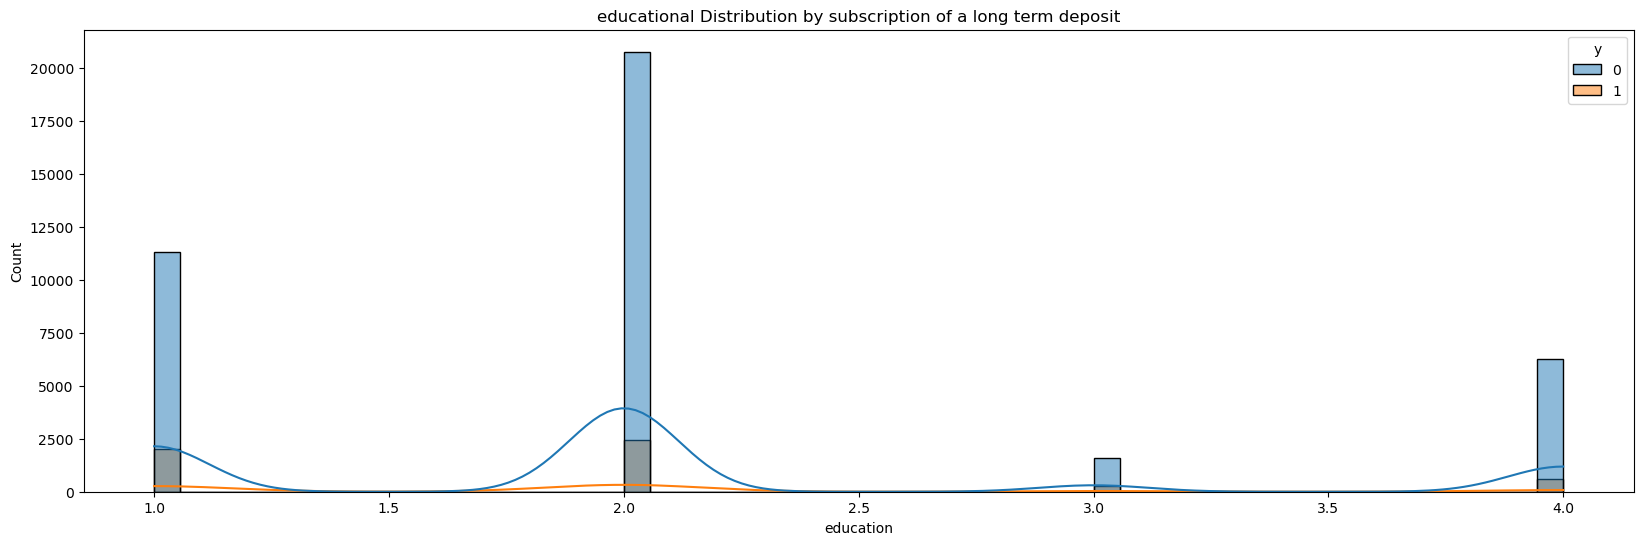

In [323]:
#the distribution of ages of the passengers
plt.figure(figsize=(20, 6))
sns.histplot(data=data1, x='education', kde=True, hue='y')
plt.title('educational Distribution by subscription of a long term deposit')
plt.show()

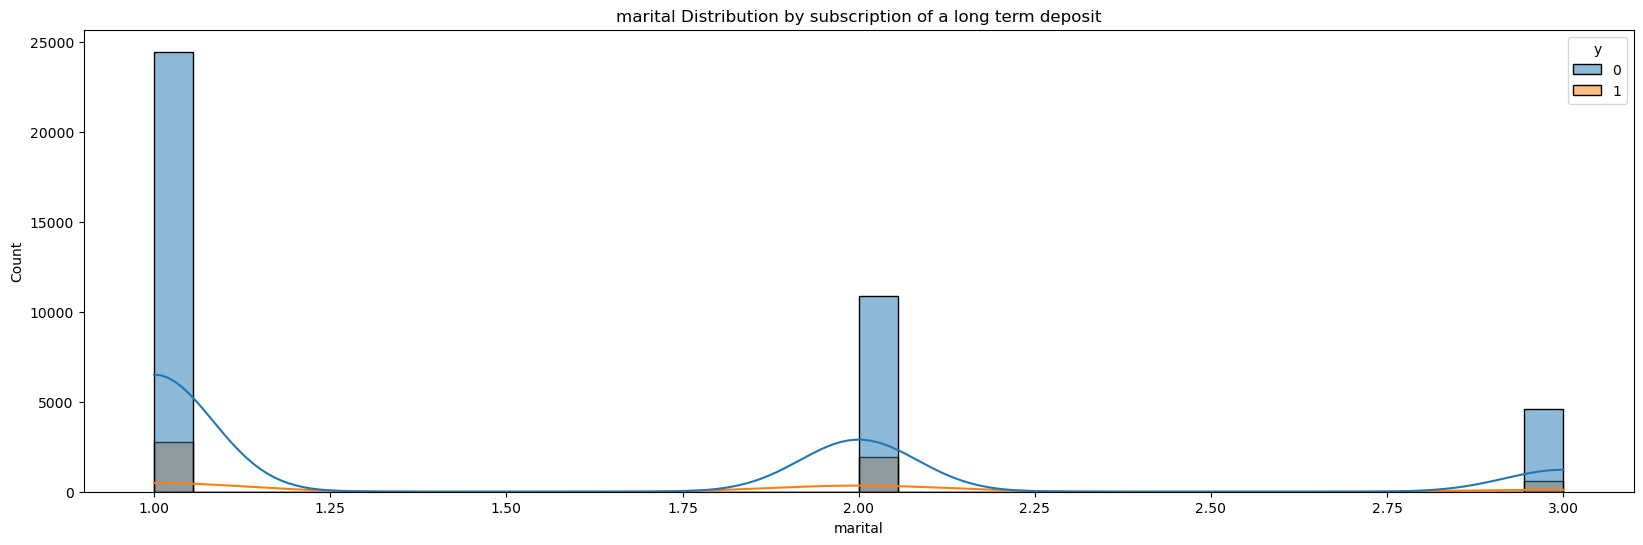

In [324]:
#the distribution of ages of the passengers
plt.figure(figsize=(20, 6))
sns.histplot(data=data1, x='marital', kde=True, hue='y')
plt.title('marital Distribution by subscription of a long term deposit')
plt.show()

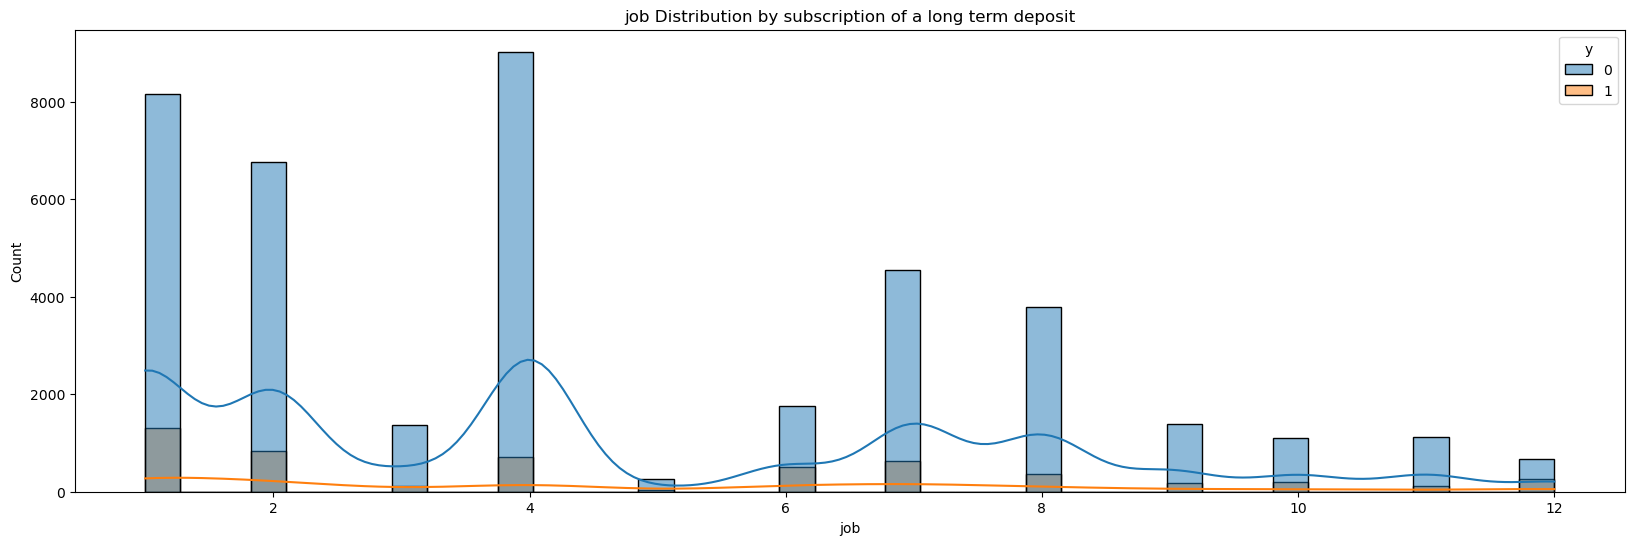

In [325]:
#the distribution of ages of the passengers
plt.figure(figsize=(20, 6))
sns.histplot(data=data1, x='job', kde=True, hue='y')
plt.title('job Distribution by subscription of a long term deposit')
plt.show()

In [328]:
x=data1.drop(columns=['y'],axis=1)
y=data1['y']

In [334]:
print(x)

       loan  contact  poutcome  job  marital  education  default  housing  \
0         1        3         1    1        1          1        1        2   
1         1        3         1    2        2          2        1        2   
2         2        3         1    3        1          2        1        2   
3         1        3         1    4        1          3        1        2   
4         1        3         1    5        2          3        1        1   
...     ...      ...       ...  ...      ...        ...      ...      ...   
45206     1        1         1    2        1          1        1        1   
45207     1        1         1    6        3          4        1        1   
45208     1        1         4    6        1          2        1        1   
45209     1        2         1    4        1          2        1        1   
45210     1        1         3    3        1          2        1        1   

       month age day balance duration campaign pdays previous  
0          

In [335]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [329]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=27)

In [330]:
print(x.shape,x_train.shape,x_test.shape)

(45211, 16) (40689, 16) (4522, 16)


Accuracy of the Decision tree classifier for data is:
 0.9055727554179567


[Text(0.5, 0.9166666666666666, 'x[12] <= 410.5\nentropy = 0.521\nsamples = 40689\nvalue = [35929, 4760]'),
 Text(0.25, 0.75, 'x[2] <= 3.5\nentropy = 0.356\nsamples = 33917\nvalue = [31628, 2289]'),
 Text(0.125, 0.5833333333333334, 'x[8] <= 4.5\nentropy = 0.289\nsamples = 32873\nvalue = [31212, 1661]'),
 Text(0.0625, 0.4166666666666667, 'x[1] <= 2.5\nentropy = 0.178\nsamples = 23905\nvalue = [23263, 642]'),
 Text(0.03125, 0.25, 'x[12] <= 154.5\nentropy = 0.258\nsamples = 14209\nvalue = [13590, 619]'),
 Text(0.015625, 0.08333333333333333, 'entropy = 0.071\nsamples = 7597\nvalue = [7532, 65]'),
 Text(0.046875, 0.08333333333333333, 'entropy = 0.415\nsamples = 6612\nvalue = [6058, 554]'),
 Text(0.09375, 0.25, 'x[2] <= 2.5\nentropy = 0.024\nsamples = 9696\nvalue = [9673, 23]'),
 Text(0.078125, 0.08333333333333333, 'entropy = 0.021\nsamples = 9684\nvalue = [9664, 20]'),
 Text(0.109375, 0.08333333333333333, 'entropy = 0.811\nsamples = 12\nvalue = [9, 3]'),
 Text(0.1875, 0.4166666666666667, 'x[

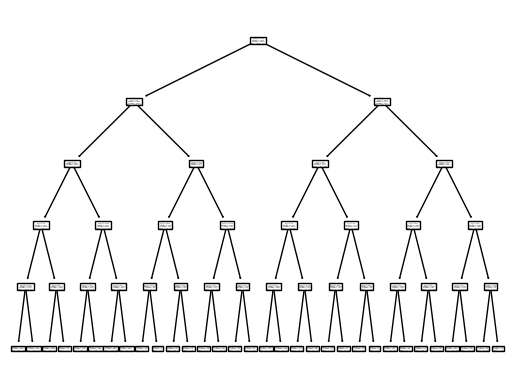

In [332]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy of the Decision tree classifier for data is:\n',accuracy)
tree.plot_tree(clf)


Accuracy of the Decision tree classifier for data is:
 0.9040247678018576


[Text(0.5, 0.9166666666666666, 'x[12] <= 549.5\ngini = 0.207\nsamples = 40689\nvalue = [35929, 4760]'),
 Text(0.25, 0.75, 'x[2] <= 3.5\ngini = 0.146\nsamples = 36647\nvalue = [33732, 2915]'),
 Text(0.125, 0.5833333333333334, 'x[12] <= 260.5\ngini = 0.116\nsamples = 35472\nvalue = [33288, 2184]'),
 Text(0.0625, 0.4166666666666667, 'x[8] <= 9.5\ngini = 0.069\nsamples = 26636\nvalue = [25678, 958]'),
 Text(0.03125, 0.25, 'x[9] <= 60.5\ngini = 0.051\nsamples = 24657\nvalue = [24008, 649]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.046\nsamples = 24299\nvalue = [23726, 573]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.334\nsamples = 358\nvalue = [282, 76]'),
 Text(0.09375, 0.25, 'x[7] <= 1.5\ngini = 0.264\nsamples = 1979\nvalue = [1670, 309]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.423\nsamples = 791\nvalue = [551, 240]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.109\nsamples = 1188\nvalue = [1119, 69]'),
 Text(0.1875, 0.4166666666666667, 'x[7] <= 1.5\ngini = 0.239

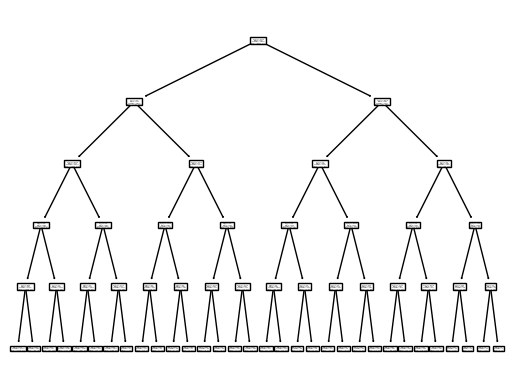

In [333]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth = 5)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy of the Decision tree classifier for data is:\n',accuracy)
tree.plot_tree(clf)

In [338]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3993
           1       0.65      0.39      0.49       529

    accuracy                           0.90      4522
   macro avg       0.79      0.68      0.72      4522
weighted avg       0.89      0.90      0.89      4522



In [339]:
print(confusion_matrix(y_test,y_pred))

[[3881  112]
 [ 322  207]]


In [ ]:
Inference:The model has a overall accuracy of 90.4%.

Confusion Matrix:

True Positives (TP): 3881

True Negatives (TN): 207

False Positives (FP) : 112

False Negatives (FN) : 322

In [340]:
# Save the model to a file
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(clf, f)

# Load the model back
with open("model.pkl", "rb") as f:
    loaded_model = pickle.load(f)

In [359]:
df=pd.DataFrame({'loan':2,
                 'contact':1,
                 'poutcome':4,
                 'job':3,
                 'marital':2,
                 'education':2,
                 'default':1,
                 'housing':2,
                 'month':2,
                 'age':37,
                 'day':17,
                 'balance':1503,
                 'duration':92,
                 'campaign':3,
                 'pdays':184,
                 'previous':0,},index=[0])
                 

In [360]:
df

,loan,contact,poutcome,job,marital,education,default,housing,month,age,day,balance,duration,campaign,pdays,previous
0,2,1,4,3,2,2,1,2,2,37,17,1503,92,3,184,0


In [361]:
result=loaded_model.predict(df)
print(result)

[0]


In [362]:
if result==1:
    print("The client subscribed a term deposit")
else:
    print(" the client has not subscribed a term deposit")

 the client has not subscribed a term deposit


In [363]:
df=pd.DataFrame({'loan':1,
                 'contact':1,
                 'poutcome':1,
                 'job':2,
                 'marital':1,
                 'education':1,
                 'default':1,
                 'housing':2,
                 'month':6,
                 'age':51,
                 'day':17,
                 'balance':825,
                 'duration':977,
                 'campaign':3,
                 'pdays':-1,
                 'previous':0},index=[0])

In [364]:
result=loaded_model.predict(df)
print(result)

[1]


In [365]:
if result==1:
    print("The client subscribed a term deposit")
else:
    print(" the client has not subscribed a term deposit")

The client subscribed a term deposit
